# Part 1:

# Data preparation (Data Cleaning and Data Preprocessing) 

Step 1:

import original CSV file from https://data.gov.sg/dataset/resale-flat-prices

In [1]:
import pandas as pd
df = pd.read_csv("resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv",header='infer')
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
100753,2021-06,YISHUN,5 ROOM,820,YISHUN ST 81,01 TO 03,121.0,Improved,1988,66 years 03 months,541000.0
100754,2021-06,YISHUN,EXECUTIVE,664,YISHUN AVE 4,01 TO 03,181.0,Apartment,1992,69 years 11 months,868000.0
100755,2021-06,YISHUN,EXECUTIVE,277,YISHUN ST 22,01 TO 03,152.0,Maisonette,1985,63 years 03 months,585000.0
100756,2021-06,YISHUN,EXECUTIVE,643,YISHUN ST 61,01 TO 03,146.0,Maisonette,1987,65 years 04 months,600000.0


Step 2: 
Check for any duplicate data in original dataset

In [2]:
print('Number of rows before discarding duplicates = %d' % (df.shape[0]))
df_remove_dup = df.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (df_remove_dup.shape[0]))

Number of rows before discarding duplicates = 100758
Number of rows after discarding duplicates = 100530


Step 3: 

i)Identify if attributes have missing data

ii)count the number of missing values in each of these attributes

In [3]:
import numpy as np

df_check_null = df_remove_dup.replace('?',np.NaN)

print('Number of instances = %d' % (df_check_null.shape[0]))
print('Number of attributes = %d' % (df_check_null.shape[1]))

print('Number of missing values:')
for col in df_check_null.columns:
    print('\t%s: %d' % (col,df_check_null[col].isna().sum()))

Number of instances = 100530
Number of attributes = 11
Number of missing values:
	month: 0
	town: 0
	flat_type: 0
	block: 0
	street_name: 0
	storey_range: 0
	floor_area_sqm: 0
	flat_model: 0
	lease_commence_date: 0
	remaining_lease: 0
	resale_price: 0


Step 4 : Drop Missing Data if any

In [4]:
print('Number of rows in original data = %d' % (df_check_null.shape[0]))
df_drop_null = df_check_null.dropna()
print('Number of rows after discarding missing values = %d' % (df_drop_null.shape[0]))

Number of rows in original data = 100530
Number of rows after discarding missing values = 100530


Step 5 : Remove non-essential columns : month, block, streen_name, flat_model

In [5]:
dfTrim = df_drop_null.drop(['month','block','street_name','flat_model'],axis=1)
dfTrim

,town,flat_type,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,resale_price
0,ANG MO KIO,2 ROOM,10 TO 12,44.0,1979,61 years 04 months,232000.0
1,ANG MO KIO,3 ROOM,01 TO 03,67.0,1978,60 years 07 months,250000.0
2,ANG MO KIO,3 ROOM,01 TO 03,67.0,1980,62 years 05 months,262000.0
3,ANG MO KIO,3 ROOM,04 TO 06,68.0,1980,62 years 01 month,265000.0
4,ANG MO KIO,3 ROOM,01 TO 03,67.0,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...
100753,YISHUN,5 ROOM,01 TO 03,121.0,1988,66 years 03 months,541000.0
100754,YISHUN,EXECUTIVE,01 TO 03,181.0,1992,69 years 11 months,868000.0
100755,YISHUN,EXECUTIVE,01 TO 03,152.0,1985,63 years 03 months,585000.0
100756,YISHUN,EXECUTIVE,01 TO 03,146.0,1987,65 years 04 months,600000.0


Step 6 : Removing Outliers

In [6]:
#remove values with zscore >3
from scipy import stats

df1 = dfTrim.loc[dfTrim['town']=='ANG MO KIO'].copy()
df1['z_score'] = stats.zscore(df1['resale_price'])
df1 = df1.loc[df1['z_score'].abs()<=3]

df2 = dfTrim.loc[dfTrim['town']=='BEDOK'].copy()
df2['z_score'] = stats.zscore(df2['resale_price'])
df2 = df2.loc[df2['z_score'].abs()<=3]

df3 = dfTrim.loc[dfTrim['town']=='BISHAN'].copy()
df3['z_score'] = stats.zscore(df3['resale_price'])
df3 = df3.loc[df3['z_score'].abs()<=3]

df4 = dfTrim.loc[dfTrim['town']=='BUKIT BATOK'].copy()
df4['z_score'] = stats.zscore(df4['resale_price'])
df4 = df4.loc[df4['z_score'].abs()<=3]

df5 = dfTrim.loc[dfTrim['town']=='BUKIT MERAH'].copy()
df5['z_score'] = stats.zscore(df5['resale_price'])
df5 = df5.loc[df5['z_score'].abs()<=3]

df6 = dfTrim.loc[dfTrim['town']=='BUKIT PANJANG'].copy()
df6['z_score'] = stats.zscore(df6['resale_price'])
df6 = df6.loc[df6['z_score'].abs()<=3]

df7 = dfTrim.loc[dfTrim['town']=='BUKIT TIMAH'].copy()
df7['z_score'] = stats.zscore(df7['resale_price'])
df7 = df7.loc[df7['z_score'].abs()<=3]

df8 = dfTrim.loc[dfTrim['town']=='CENTRAL AREA'].copy()
df8['z_score'] = stats.zscore(df8['resale_price'])
df8 = df8.loc[df8['z_score'].abs()<=3]

df9 = dfTrim.loc[dfTrim['town']=='CLEMENTI'].copy()
df9['z_score'] = stats.zscore(df9['resale_price'])
df9 = df9.loc[df9['z_score'].abs()<=3]

df10 = dfTrim.loc[dfTrim['town']=='GEYLANG'].copy()
df10['z_score'] = stats.zscore(df10['resale_price'])
df10 = df10.loc[df10['z_score'].abs()<=3]

df11 = dfTrim.loc[dfTrim['town']=='HOUGANG'].copy()
df11['z_score'] = stats.zscore(df11['resale_price'])
df11 = df11.loc[df11['z_score'].abs()<=3]

df12 = dfTrim.loc[dfTrim['town']=='JURONG EAST'].copy()
df12['z_score'] = stats.zscore(df12['resale_price'])
df12 = df12.loc[df12['z_score'].abs()<=3]

df13 = dfTrim.loc[dfTrim['town']=='JURONG WEST'].copy()
df13['z_score'] = stats.zscore(df13['resale_price'])
df13 = df13.loc[df13['z_score'].abs()<=3]

df14 = dfTrim.loc[dfTrim['town']=='KALLANG/WHAMPOA'].copy()
df14['z_score'] = stats.zscore(df14['resale_price'])
df14 = df14.loc[df14['z_score'].abs()<=3]

df15 = dfTrim.loc[dfTrim['town']=='MARINE PARADE'].copy()
df15['z_score'] = stats.zscore(df15['resale_price'])
df15 = df15.loc[df15['z_score'].abs()<=3]

df16 = dfTrim.loc[dfTrim['town']=='PASIR RIS'].copy()
df16['z_score'] = stats.zscore(df16['resale_price'])
df16 = df16.loc[df16['z_score'].abs()<=3]

df17 = dfTrim.loc[dfTrim['town']=='PUNGGOL'].copy()
df17['z_score'] = stats.zscore(df17['resale_price'])
df17 = df17.loc[df17['z_score'].abs()<=3]

df18 = dfTrim.loc[dfTrim['town']=='QUEENSTOWN'].copy()
df18['z_score'] = stats.zscore(df18['resale_price'])
df18 = df18.loc[df18['z_score'].abs()<=3]

df19 = dfTrim.loc[dfTrim['town']=='SEMBAWANG'].copy()
df19['z_score'] = stats.zscore(df19['resale_price'])
df19 = df19.loc[df19['z_score'].abs()<=3]

df20 = dfTrim.loc[dfTrim['town']=='SENGKANG'].copy()
df20['z_score'] = stats.zscore(df20['resale_price'])
df20 = df20.loc[df20['z_score'].abs()<=3]

df21 = dfTrim.loc[dfTrim['town']=='SERANGOON'].copy()
df21['z_score'] = stats.zscore(df21['resale_price'])
df21 = df21.loc[df21['z_score'].abs()<=3]

df22 = dfTrim.loc[dfTrim['town']=='TAMPINES'].copy()
df22['z_score'] = stats.zscore(df22['resale_price'])
df22 = df22.loc[df22['z_score'].abs()<=3]

df23 = dfTrim.loc[dfTrim['town']=='TOA PAYOH'].copy()
df23['z_score'] = stats.zscore(df23['resale_price'])
df23 = df23.loc[df23['z_score'].abs()<=3]

df24 = dfTrim.loc[dfTrim['town']=='WOODLANDS'].copy()
df24['z_score'] = stats.zscore(df24['resale_price'])
df24 = df24.loc[df24['z_score'].abs()<=3]

df25 = dfTrim.loc[dfTrim['town']=='YISHUN'].copy()
df25['z_score'] = stats.zscore(df25['resale_price'])
df25 = df25.loc[df25['z_score'].abs()<=3]

df26 = dfTrim.loc[dfTrim['town']=='CHOA CHU KANG'].copy()
df26['z_score'] = stats.zscore(df26['resale_price'])
df26 = df26.loc[df26['z_score'].abs()<=3]

frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, 
          df14, df15, df16, df17, df18, df19, df20, df21, df22, df23, df24, df25, df26]

dfRemoveDup = pd.concat(frames)
dfRemoveDup = dfRemoveDup.drop(columns=['z_score'])
dfRemoveDup.town.unique()

#dfTrim['z_score']=stats.zscore(dfTrim['resale_price'])
#dfRemoveDup = dfTrim.loc[dfTrim['z_score'].abs()<=3]

#can export step6 as cleandataset, as step7 will be classifying and editing data

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN', 'CHOA CHU KANG'], dtype=object)

Normalize resale_price, haven replace in dataset yet

In [7]:
dfNormalized_resalePrice = (dfRemoveDup.resale_price - dfRemoveDup.resale_price.mean()) / dfRemoveDup.resale_price.std()
dfNormalized_resalePrice

0       -1.396308
1       -1.280170
2       -1.202745
3       -1.183389
4       -1.183389
           ...   
99478    1.332929
99479    0.203812
99480    1.158723
99481    1.236148
99482    1.074845
Name: resale_price, Length: 100102, dtype: float64

Step 7 : Classifying 'town' and 'flat_type'

In [8]:
#north=1, northeast=2, central=3, northwest=4, west=5, east=6
replace_town = {'HOUGANG':2, 'WOODLANDS':1, 'BUKIT MERAH':3, 'SENGKANG':2, 
                'CHOA CHU KANG':4, 'JURONG WEST':5, 'BEDOK':6, 'TAMPINES':6, 
                'KALLANG/WHAMPOA':3, 'GEYLANG':3, 'YISHUN':1, 'SERANGOON':2, 
                'QUEENSTOWN':3, 'BISHAN':3, 'PUNGGOL':2, 'ANG MO KIO':2, 
                'TOA PAYOH':3, 'BUKIT BATOK':5, 'CENTRAL AREA':3, 'SEMBAWANG':1, 
                'JURONG EAST':5, 'CLEMENTI':5, 'MARINE PARADE':3, 'PASIR RIS':6, 
                'BUKIT PANJANG':5, 'BUKIT TIMAH':3}

#1room=1, 2room=2, 3room=3, 4room=4, 5room=5, executive=6, multigen=7
replace_ft = {'1 ROOM':1, '2 ROOM':2, '3 ROOM':3, '4 ROOM':4, 
              '5 ROOM':5, 'EXECUTIVE':6, 'MULTI-GENERATION':7}

dfRemoveDup['town'] = dfRemoveDup['town'].map(replace_town)
dfRemoveDup['flat_type'] = dfRemoveDup['flat_type'].map(replace_ft)

dfClassified = dfRemoveDup.copy()
dfClassified = dfClassified.reset_index()
del dfClassified['index']

dfClassified

#dfRemoveDup['resale_price'] = pd.cut(dfRemoveDup.resale_price, 
#                                     bins=[0,250000,260000,270000,280000,290000,300000,
#                                           310000,320000,330000,340000,350000,360000,370000,380000,390000,400000,
#                                           410000,420000,430000,440000,450000,460000,470000,480000,490000,500000,
#                                           510000,520000,530000,540000,550000,560000,570000,580000,590000,600000,
#                                           610000,620000,630000,640000,650000,660000,670000,680000,690000,700000,np.inf],
#                                     labels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,
#                                             26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47])


,town,flat_type,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,resale_price
0,2,2,10 TO 12,44.0,1979,61 years 04 months,232000.0
1,2,3,01 TO 03,67.0,1978,60 years 07 months,250000.0
2,2,3,01 TO 03,67.0,1980,62 years 05 months,262000.0
3,2,3,04 TO 06,68.0,1980,62 years 01 month,265000.0
4,2,3,01 TO 03,67.0,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...
100097,4,6,04 TO 06,146.0,1995,73 years 03 months,655000.0
100098,4,6,07 TO 09,148.0,1995,72 years 11 months,480000.0
100099,4,6,04 TO 06,146.0,1996,73 years 08 months,628000.0
100100,4,6,01 TO 03,146.0,1989,66 years 11 months,640000.0


Add new column number_of_people.
assume max number of people for a given flat_type = n + 1 , executive and multigen = 7
1 room = 2 people, 2 room = 3 people, 3room = 4 people, 4room = 5 people, 5room = 6 people, executive = 7, multigen=7

In [9]:
number_of_people = []
for row in dfClassified.index:
    if dfClassified['flat_type'][row] == 1 :
        number_of_people.append(2)
    elif dfClassified['flat_type'][row] == 2 :
        number_of_people.append(3)
    elif dfClassified['flat_type'][row] == 3 :
        number_of_people.append(4)
    elif dfClassified['flat_type'][row] == 4 :
        number_of_people.append(5)
    elif dfClassified['flat_type'][row] == 5 :
        number_of_people.append(6)
    elif dfClassified['flat_type'][row] == 6 :
        number_of_people.append(7)
    elif dfClassified['flat_type'][row] == 7 :
        number_of_people.append(7)
    else:
        number_of_people.append('rip')
dfClassified['number_of_people'] = number_of_people
dfClassified

,town,flat_type,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,resale_price,number_of_people
0,2,2,10 TO 12,44.0,1979,61 years 04 months,232000.0,3
1,2,3,01 TO 03,67.0,1978,60 years 07 months,250000.0,4
2,2,3,01 TO 03,67.0,1980,62 years 05 months,262000.0,4
3,2,3,04 TO 06,68.0,1980,62 years 01 month,265000.0,4
4,2,3,01 TO 03,67.0,1980,62 years 05 months,265000.0,4
...,...,...,...,...,...,...,...,...
100097,4,6,04 TO 06,146.0,1995,73 years 03 months,655000.0,7
100098,4,6,07 TO 09,148.0,1995,72 years 11 months,480000.0,7
100099,4,6,04 TO 06,146.0,1996,73 years 08 months,628000.0,7
100100,4,6,01 TO 03,146.0,1989,66 years 11 months,640000.0,7


In [10]:
label = []
for row in dfClassified.index:
    if (dfClassified['resale_price'][row]<=150000) & (dfClassified['flat_type'][row]==1):
        label.append(1)
    elif (dfClassified['resale_price'][row]<=150000) & (dfClassified['flat_type'][row]==2):
        label.append(2)
    elif (dfClassified['resale_price'][row]<=150000) & (dfClassified['flat_type'][row]==3):
        label.append(3)
    elif (dfClassified['resale_price'][row]<=150000) & (dfClassified['flat_type'][row]==4):
        label.append(4)
    elif (dfClassified['resale_price'][row]<=150000) & (dfClassified['flat_type'][row]==5):
        label.append(5)
    elif (dfClassified['resale_price'][row]<=150000) & (dfClassified['flat_type'][row]==6):
        label.append(6)
    elif (dfClassified['resale_price'][row]<=150000) & (dfClassified['flat_type'][row]==7):
        label.append(7)
    elif (dfClassified['resale_price'][row]<=250000) & (dfClassified['flat_type'][row]==1):
        label.append(8)
    elif (dfClassified['resale_price'][row]<=250000) & (dfClassified['flat_type'][row]==2):
        label.append(9)
    elif (dfClassified['resale_price'][row]<=250000) & (dfClassified['flat_type'][row]==3):
        label.append(10)
    elif (dfClassified['resale_price'][row]<=250000) & (dfClassified['flat_type'][row]==4):
        label.append(11)
    elif (dfClassified['resale_price'][row]<=250000) & (dfClassified['flat_type'][row]==5):
        label.append(12)
    elif (dfClassified['resale_price'][row]<=250000) & (dfClassified['flat_type'][row]==6):
        label.append(13)
    elif (dfClassified['resale_price'][row]<=250000) & (dfClassified['flat_type'][row]==7):
        label.append(14)
    elif (dfClassified['resale_price'][row]<=350000) & (dfClassified['flat_type'][row]==1):
        label.append(15)
    elif (dfClassified['resale_price'][row]<=350000) & (dfClassified['flat_type'][row]==2):
        label.append(16)
    elif (dfClassified['resale_price'][row]<=350000) & (dfClassified['flat_type'][row]==3):
        label.append(17)
    elif (dfClassified['resale_price'][row]<=350000) & (dfClassified['flat_type'][row]==4):
        label.append(18)
    elif (dfClassified['resale_price'][row]<=350000) & (dfClassified['flat_type'][row]==5):
        label.append(19)
    elif (dfClassified['resale_price'][row]<=350000) & (dfClassified['flat_type'][row]==6):
        label.append(20)
    elif (dfClassified['resale_price'][row]<=350000) & (dfClassified['flat_type'][row]==7):
        label.append(21)
    elif (dfClassified['resale_price'][row]<=450000) & (dfClassified['flat_type'][row]==1):
        label.append(22)
    elif (dfClassified['resale_price'][row]<=450000) & (dfClassified['flat_type'][row]==2):
        label.append(23)
    elif (dfClassified['resale_price'][row]<=450000) & (dfClassified['flat_type'][row]==3):
        label.append(24)
    elif (dfClassified['resale_price'][row]<=450000) & (dfClassified['flat_type'][row]==4):
        label.append(25)
    elif (dfClassified['resale_price'][row]<=450000) & (dfClassified['flat_type'][row]==5):
        label.append(26)
    elif (dfClassified['resale_price'][row]<=450000) & (dfClassified['flat_type'][row]==6):
        label.append(27)
    elif (dfClassified['resale_price'][row]<=450000) & (dfClassified['flat_type'][row]==7):
        label.append(28)
    elif (dfClassified['resale_price'][row]<=550000) & (dfClassified['flat_type'][row]==1):
        label.append(29)
    elif (dfClassified['resale_price'][row]<=550000) & (dfClassified['flat_type'][row]==2):
        label.append(30)
    elif (dfClassified['resale_price'][row]<=550000) & (dfClassified['flat_type'][row]==3):
        label.append(31)
    elif (dfClassified['resale_price'][row]<=550000) & (dfClassified['flat_type'][row]==4):
        label.append(32)
    elif (dfClassified['resale_price'][row]<=550000) & (dfClassified['flat_type'][row]==5):
        label.append(33)
    elif (dfClassified['resale_price'][row]<=550000) & (dfClassified['flat_type'][row]==6):
        label.append(34)
    elif (dfClassified['resale_price'][row]<=550000) & (dfClassified['flat_type'][row]==7):
        label.append(35)
    elif (dfClassified['resale_price'][row]>550000) & (dfClassified['flat_type'][row]==1):
        label.append(36)
    elif (dfClassified['resale_price'][row]>550000) & (dfClassified['flat_type'][row]==2):
        label.append(37)
    elif (dfClassified['resale_price'][row]>550000) & (dfClassified['flat_type'][row]==3):
        label.append(38)
    elif (dfClassified['resale_price'][row]>550000) & (dfClassified['flat_type'][row]==4):
        label.append(39)
    elif (dfClassified['resale_price'][row]>550000) & (dfClassified['flat_type'][row]==5):
        label.append(40)
    elif (dfClassified['resale_price'][row]>550000) & (dfClassified['flat_type'][row]==6):
        label.append(41)
    elif (dfClassified['resale_price'][row]>550000) & (dfClassified['flat_type'][row]==7):
        label.append(42)
    else:
        label.append('rip')

dfClassified['label'] = label
dfClassified


,town,flat_type,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,resale_price,number_of_people,label
0,2,2,10 TO 12,44.0,1979,61 years 04 months,232000.0,3,9
1,2,3,01 TO 03,67.0,1978,60 years 07 months,250000.0,4,10
2,2,3,01 TO 03,67.0,1980,62 years 05 months,262000.0,4,17
3,2,3,04 TO 06,68.0,1980,62 years 01 month,265000.0,4,17
4,2,3,01 TO 03,67.0,1980,62 years 05 months,265000.0,4,17
...,...,...,...,...,...,...,...,...,...
100097,4,6,04 TO 06,146.0,1995,73 years 03 months,655000.0,7,41
100098,4,6,07 TO 09,148.0,1995,72 years 11 months,480000.0,7,34
100099,4,6,04 TO 06,146.0,1996,73 years 08 months,628000.0,7,41
100100,4,6,01 TO 03,146.0,1989,66 years 11 months,640000.0,7,41


# NEW - Do PCA using dfClassified, same as livecoding

In [11]:
from sklearn import preprocessing

X=dfClassified[['floor_area_sqm', 'resale_price','flat_type']].to_numpy()
standard = preprocessing.StandardScaler().fit(X)
standardized = standard.transform(X)
print(standardized)

Y=dfClassified[['label']].to_numpy()
Y=Y.reshape(-1)
print(Y)

[[-2.23841625 -1.39631492 -2.32343888]
 [-1.2773867  -1.28017658 -1.23776904]
 [-1.2773867  -1.20275102 -1.23776904]
 ...
 [ 2.02354088  1.15872852  2.01924049]
 [ 2.02354088  1.23615408  2.01924049]
 [ 2.02354088  1.07485083  2.01924049]]
[ 9 10 17 ... 41 41 41]


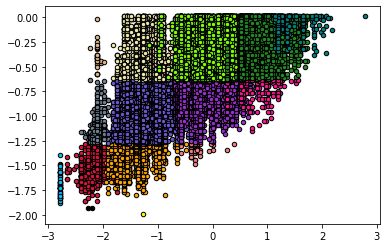

In [12]:
import matplotlib.pyplot as plt

reds = Y == 1
black = Y == 2
yellow = Y == 3
blue = Y == 4
aqua = Y == 5
magenta = Y == 6
brown = Y == 7
deepskyblue = Y == 8
crimson = Y == 9
orange = Y == 10

lightcoral = Y == 11
silver = Y == 12
chocolate = Y == 13
mediumseagreen = Y == 14
powderblue = Y == 15
slategrey = Y == 16
slateblue = Y == 17
darkorchid = Y == 18
deeppink = Y == 19
lavenderblush = Y == 20

maroon = Y == 21
saddlebrown = Y == 22
burlywood = Y == 23
palegoldenrod = Y == 24
chartreuse = Y == 25
forestgreen = Y == 26
teal = Y == 27

plt.scatter(standardized[reds, 0], standardized[reds, 1], c="red",s=20, edgecolor='k')
plt.scatter(standardized[black, 0], standardized[black, 1], c="black", s=20, edgecolor='k')
plt.scatter(standardized[yellow, 0], standardized[yellow, 1], c="yellow",s=20, edgecolor='k')
plt.scatter(standardized[blue, 0], standardized[blue, 1], c="blue", s=20, edgecolor='k')
plt.scatter(standardized[aqua, 0], standardized[aqua, 1], c="aqua",s=20, edgecolor='k')
plt.scatter(standardized[magenta, 0], standardized[magenta, 1], c="magenta", s=20, edgecolor='k')
plt.scatter(standardized[brown, 0], standardized[brown, 1], c="brown",s=20, edgecolor='k')
plt.scatter(standardized[deepskyblue, 0], standardized[deepskyblue, 1], c="deepskyblue", s=20, edgecolor='k')
plt.scatter(standardized[crimson, 0], standardized[crimson, 1], c="crimson",s=20, edgecolor='k')
plt.scatter(standardized[orange, 0], standardized[orange, 1], c="orange", s=20, edgecolor='k')

plt.scatter(standardized[lightcoral, 0], standardized[lightcoral, 1], c="lightcoral",s=20, edgecolor='k')
plt.scatter(standardized[silver, 0], standardized[silver, 1], c="silver", s=20, edgecolor='k')
plt.scatter(standardized[chocolate, 0], standardized[chocolate, 1], c="chocolate",s=20, edgecolor='k')
plt.scatter(standardized[mediumseagreen, 0], standardized[mediumseagreen, 1], c="mediumseagreen", s=20, edgecolor='k')
plt.scatter(standardized[powderblue, 0], standardized[powderblue, 1], c="powderblue",s=20, edgecolor='k')
plt.scatter(standardized[slategrey, 0], standardized[slategrey, 1], c="slategrey", s=20, edgecolor='k')
plt.scatter(standardized[slateblue, 0], standardized[slateblue, 1], c="slateblue",s=20, edgecolor='k')
plt.scatter(standardized[darkorchid, 0], standardized[darkorchid, 1], c="darkorchid", s=20, edgecolor='k')
plt.scatter(standardized[deeppink, 0], standardized[deeppink, 1], c="deeppink",s=20, edgecolor='k')
plt.scatter(standardized[lavenderblush, 0], standardized[lavenderblush, 1], c="lavenderblush", s=20, edgecolor='k')

plt.scatter(standardized[maroon, 0], standardized[maroon, 1], c="maroon",s=20, edgecolor='k')
plt.scatter(standardized[saddlebrown, 0], standardized[saddlebrown, 1], c="saddlebrown", s=20, edgecolor='k')
plt.scatter(standardized[burlywood, 0], standardized[burlywood, 1], c="burlywood",s=20, edgecolor='k')
plt.scatter(standardized[palegoldenrod, 0], standardized[palegoldenrod, 1], c="palegoldenrod", s=20, edgecolor='k')
plt.scatter(standardized[chartreuse, 0], standardized[chartreuse, 1], c="chartreuse",s=20, edgecolor='k')
plt.scatter(standardized[forestgreen, 0], standardized[forestgreen, 1], c="forestgreen", s=20, edgecolor='k')
plt.scatter(standardized[teal, 0], standardized[teal, 1], c="teal",s=20, edgecolor='k')


In [13]:
from sklearn.decomposition import PCA
pca_all = PCA()
pca_all.fit(standardized)
print(standardized)

[[-2.23841625 -1.39631492 -2.32343888]
 [-1.2773867  -1.28017658 -1.23776904]
 [-1.2773867  -1.20275102 -1.23776904]
 ...
 [ 2.02354088  1.15872852  2.01924049]
 [ 2.02354088  1.23615408  2.01924049]
 [ 2.02354088  1.07485083  2.01924049]]


[0.82795631 0.15625291 0.01579078]


Text(0.5, 1.0, 'Plot of eigen variance energy captured by Principle component')

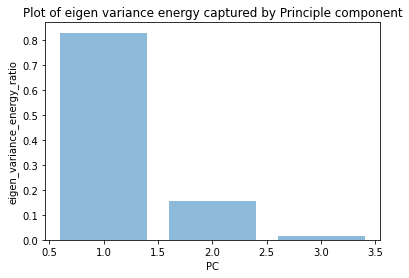

In [14]:
eigen_energy=pca_all.explained_variance_ratio_
print(eigen_energy)
plt.bar(range(1,4), eigen_energy, alpha=0.5, align='center', label='individual explained variance')
plt.xlabel('PC')
plt.ylabel('eigen_variance_energy_ratio')
plt.title("Plot of eigen variance energy captured by Principle component")

In [15]:
pca_2 = PCA(n_components=2)
pca_2.fit(standardized)
X_pca_2=pca_2.transform(standardized)
print(X_pca_2)
print(X_pca_2.shape) #2 PC used

[[-3.48506893  0.45719661]
 [-2.18341237 -0.18459617]
 [-2.14365377 -0.11817162]
 ...
 [ 3.04799275 -0.47375293]
 [ 3.08775135 -0.40732838]
 [ 3.00492093 -0.54571286]]
(100102, 2)


Text(0.5, 1.0, 'Projection of Data in Eigenspace')

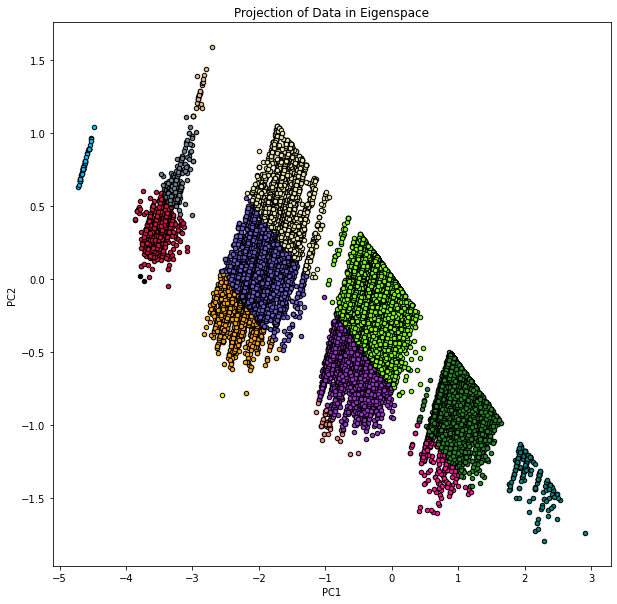

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(X_pca_2[reds, 0], X_pca_2[reds, 1], c="red",s=20, edgecolor='k')
plt.scatter(X_pca_2[black, 0], X_pca_2[black, 1], c="black",s=20, edgecolor='k')
plt.scatter(X_pca_2[yellow, 0], X_pca_2[yellow, 1], c="yellow",s=20, edgecolor='k')
plt.scatter(X_pca_2[blue, 0], X_pca_2[blue, 1], c="blue", s=20, edgecolor='k')
plt.scatter(X_pca_2[aqua, 0], X_pca_2[aqua, 1], c="aqua",s=20, edgecolor='k')
plt.scatter(X_pca_2[magenta, 0], X_pca_2[magenta, 1], c="magenta", s=20, edgecolor='k')
plt.scatter(X_pca_2[brown, 0], X_pca_2[brown, 1], c="brown",s=20, edgecolor='k')
plt.scatter(X_pca_2[deepskyblue, 0], X_pca_2[deepskyblue, 1], c="deepskyblue", s=20, edgecolor='k')
plt.scatter(X_pca_2[crimson, 0], X_pca_2[crimson, 1], c="crimson",s=20, edgecolor='k')
plt.scatter(X_pca_2[orange, 0], X_pca_2[orange, 1], c="orange", s=20, edgecolor='k')

plt.scatter(X_pca_2[lightcoral, 0], X_pca_2[lightcoral, 1], c="lightcoral",s=20, edgecolor='k')
plt.scatter(X_pca_2[silver, 0], X_pca_2[silver, 1], c="silver",s=20, edgecolor='k')
plt.scatter(X_pca_2[chocolate, 0], X_pca_2[chocolate, 1], c="chocolate",s=20, edgecolor='k')
plt.scatter(X_pca_2[mediumseagreen, 0], X_pca_2[mediumseagreen, 1], c="mediumseagreen", s=20, edgecolor='k')
plt.scatter(X_pca_2[powderblue, 0], X_pca_2[powderblue, 1], c="powderblue",s=20, edgecolor='k')
plt.scatter(X_pca_2[slategrey, 0], X_pca_2[slategrey, 1], c="slategrey", s=20, edgecolor='k')
plt.scatter(X_pca_2[slateblue, 0], X_pca_2[slateblue, 1], c="slateblue", s=20, edgecolor='k')
plt.scatter(X_pca_2[darkorchid, 0], X_pca_2[darkorchid, 1], c="darkorchid",s=20, edgecolor='k')
plt.scatter(X_pca_2[deeppink, 0], X_pca_2[deeppink, 1], c="deeppink", s=20, edgecolor='k')
plt.scatter(X_pca_2[lavenderblush, 0], X_pca_2[lavenderblush, 1], c="lavenderblush",s=20, edgecolor='k')

plt.scatter(X_pca_2[maroon, 0], X_pca_2[maroon, 1], c="maroon",s=20, edgecolor='k')
plt.scatter(X_pca_2[saddlebrown, 0], X_pca_2[saddlebrown, 1], c="saddlebrown",s=20, edgecolor='k')
plt.scatter(X_pca_2[burlywood, 0], X_pca_2[burlywood, 1], c="burlywood",s=20, edgecolor='k')
plt.scatter(X_pca_2[palegoldenrod, 0], X_pca_2[palegoldenrod, 1], c="palegoldenrod", s=20, edgecolor='k')
plt.scatter(X_pca_2[chartreuse, 0], X_pca_2[chartreuse, 1], c="chartreuse",s=20, edgecolor='k')
plt.scatter(X_pca_2[forestgreen, 0], X_pca_2[forestgreen, 1], c="forestgreen", s=20, edgecolor='k')
plt.scatter(X_pca_2[teal, 0], X_pca_2[teal, 1], c="teal",s=20, edgecolor='k')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection of Data in Eigenspace')

In [17]:
X_pca_2_back=pca_2.inverse_transform(X_pca_2)
print(X_pca_2_back)

[[-2.28185862 -1.39737309 -2.27929899]
 [-1.25233637 -1.2795664  -1.26322158]
 [-1.25326405 -1.20216344 -1.26227901]
 ...
 [ 2.02349002  1.15872728  2.01929217]
 [ 2.02256234  1.23613025  2.02023474]
 [ 2.02449501  1.07487408  2.01827104]]


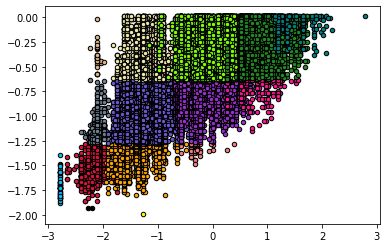

In [18]:
plt.scatter(standardized[reds, 0], standardized[reds, 1], c="red",s=20, edgecolor='k')
plt.scatter(standardized[black, 0], standardized[black, 1], c="black", s=20, edgecolor='k')
plt.scatter(standardized[yellow, 0], standardized[yellow, 1], c="yellow",s=20, edgecolor='k')
plt.scatter(standardized[blue, 0], standardized[blue, 1], c="blue", s=20, edgecolor='k')
plt.scatter(standardized[aqua, 0], standardized[aqua, 1], c="aqua",s=20, edgecolor='k')
plt.scatter(standardized[magenta, 0], standardized[magenta, 1], c="magenta", s=20, edgecolor='k')
plt.scatter(standardized[brown, 0], standardized[brown, 1], c="brown",s=20, edgecolor='k')
plt.scatter(standardized[deepskyblue, 0], standardized[deepskyblue, 1], c="deepskyblue", s=20, edgecolor='k')
plt.scatter(standardized[crimson, 0], standardized[crimson, 1], c="crimson",s=20, edgecolor='k')
plt.scatter(standardized[orange, 0], standardized[orange, 1], c="orange", s=20, edgecolor='k')

plt.scatter(standardized[lightcoral, 0], standardized[lightcoral, 1], c="lightcoral",s=20, edgecolor='k')
plt.scatter(standardized[silver, 0], standardized[silver, 1], c="silver", s=20, edgecolor='k')
plt.scatter(standardized[chocolate, 0], standardized[chocolate, 1], c="chocolate",s=20, edgecolor='k')
plt.scatter(standardized[mediumseagreen, 0], standardized[mediumseagreen, 1], c="mediumseagreen", s=20, edgecolor='k')
plt.scatter(standardized[powderblue, 0], standardized[powderblue, 1], c="powderblue",s=20, edgecolor='k')
plt.scatter(standardized[slategrey, 0], standardized[slategrey, 1], c="slategrey", s=20, edgecolor='k')
plt.scatter(standardized[slateblue, 0], standardized[slateblue, 1], c="slateblue",s=20, edgecolor='k')
plt.scatter(standardized[darkorchid, 0], standardized[darkorchid, 1], c="darkorchid", s=20, edgecolor='k')
plt.scatter(standardized[deeppink, 0], standardized[deeppink, 1], c="deeppink",s=20, edgecolor='k')
plt.scatter(standardized[lavenderblush, 0], standardized[lavenderblush, 1], c="lavenderblush", s=20, edgecolor='k')

plt.scatter(standardized[maroon, 0], standardized[maroon, 1], c="maroon",s=20, edgecolor='k')
plt.scatter(standardized[saddlebrown, 0], standardized[saddlebrown, 1], c="saddlebrown", s=20, edgecolor='k')
plt.scatter(standardized[burlywood, 0], standardized[burlywood, 1], c="burlywood",s=20, edgecolor='k')
plt.scatter(standardized[palegoldenrod, 0], standardized[palegoldenrod, 1], c="palegoldenrod", s=20, edgecolor='k')
plt.scatter(standardized[chartreuse, 0], standardized[chartreuse, 1], c="chartreuse",s=20, edgecolor='k')
plt.scatter(standardized[forestgreen, 0], standardized[forestgreen, 1], c="forestgreen", s=20, edgecolor='k')
plt.scatter(standardized[teal, 0], standardized[teal, 1], c="teal",s=20, edgecolor='k')

# Part 2: 

# Data Mining Algorithm

Prediction model : KNN & Decision Tree

# Find the knee point and maxdepth

In [19]:
###########################################################
# Create the Training and Test set with split 70:30 
##########################################################

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_2, Y, test_size=0.3, random_state=12)
from sklearn import tree
from sklearn.metrics import accuracy_score

Text(0, 0.5, 'Accuracy')

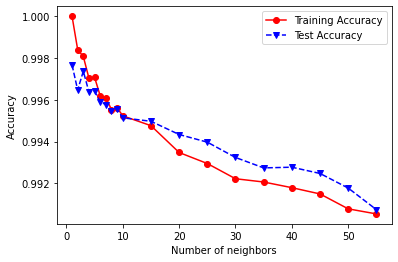

In [20]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

numNeighbors = [1,2,3,4,5,6,7,8,9,10, 15, 20, 25, 30,35,40,45,50,55]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clfKNN = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clfKNN.fit(X_train, Y_train)
    Y_predTrain = clfKNN.predict(X_train)
    Y_predTest = clfKNN.predict(X_test)
    trainAcc.append(accuracy_score(Y_train, Y_predTrain))
    testAcc.append(accuracy_score(Y_test, Y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

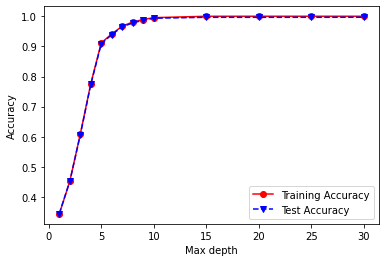

In [21]:
###########################################################################
# Model fit and performance evaluation for various tree depth from 2-50
###########################################################################
from sklearn.tree import DecisionTreeClassifier
maxdepths = [1,2,3,4,5,6,7,8,9,10,15,20,25,30]  # 14 different depths

trainAccuracy = np.zeros(len(maxdepths))
testAccuracy = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clfDT = tree.DecisionTreeClassifier(max_depth=depth)
    clfDT = clfDT.fit(X_train, Y_train)
    Y_predTrain = clfDT.predict(X_train)
    Y_predTest = clfDT.predict(X_test)
    trainAccuracy[index] = accuracy_score(Y_train, Y_predTrain)
    testAccuracy[index] = accuracy_score(Y_test, Y_predTest)
    index += 1
    
###########################################################################
# Plot training and test accuracies
##########################################################################
    
plt.plot(maxdepths,trainAccuracy,'ro-',maxdepths,testAccuracy,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

# Part 3:

# Data Visualization

# KNN prediction

In [22]:
from sklearn.neighbors import KNeighborsClassifier
#combinig into single listof tuples
features=list(zip(dfClassified['floor_area_sqm'], dfClassified['resale_price'], dfClassified['flat_type']))


model = KNeighborsClassifier(n_neighbors=5)
model.fit(features,label)

user_choice_area = 150
user_choice_price = 600000
user_choice_flat = 6

#Predict Output
#4,3,230000 -> town=4, flat_type=3, resale_price=230000
# Bernie testing 4,3,5,300000 -> town=4, flat_type=3, resale_price=230000, number_of_people = 5
predicted= model.predict([[user_choice_area,user_choice_price,user_choice_flat]])
print('Predicted label:', predicted)

Predicted label: [41]


# KNN Recommendation

In [23]:
dfResult = dfClassified.loc[dfClassified['label'] == predicted[0]]
dfResult.sort_values(by=['resale_price']).head()

,town,flat_type,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,resale_price,number_of_people,label
83064,1,6,07 TO 09,142.0,1999,81 years 02 months,551000.0,7,41
60032,1,6,13 TO 15,141.0,1998,80 years 02 months,551000.0,7,41
41642,5,6,01 TO 03,146.0,1997,75 years 09 months,552000.0,7,41
50067,2,6,07 TO 09,128.0,2004,86 years,552500.0,7,41
85080,1,6,10 TO 12,141.0,1997,77 years 11 months,552800.0,7,41


# Decision Tree prediction

In [24]:
from sklearn import tree

Y = dfClassified['label']
X = dfClassified.drop(['town','storey_range','lease_commence_date','remaining_lease','number_of_people','label'],axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=10)
clf = clf.fit(X, Y)

[Text(801.6996951219512, 1019.25, 'resale_price <= 450004.0\nentropy = 3.542\nsamples = 100102\nvalue = [2, 1, 47, 1127, 3575, 50, 353, 15452, 8614, 296\n30, 3474, 19075, 8137, 178, 2, 762, 7825, 8142, 1950\n467, 6178, 8660, 5682, 23]\nclass = '),
 Text(514.6189024390244, 883.35, 'resale_price <= 350044.0\nentropy = 2.532\nsamples = 60411\nvalue = [2, 1, 47, 1127, 3575, 50, 353, 15452, 8614, 296\n30, 3474, 19075, 8137, 178, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0]\nclass = '),
 Text(348.75, 747.45, 'flat_type <= 3.5\nentropy = 1.731\nsamples = 29517\nvalue = [2, 1, 47, 1127, 3575, 50, 353, 15452, 8614, 296, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]\nclass =  '),
 Text(221.15853658536585, 611.55, 'resale_price <= 250044.0\nentropy = 1.101\nsamples = 20557\nvalue = [2, 1, 47, 1127, 3575, 0, 353, 15452, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]\nclass =  '),
 Text(136.09756097560975, 475.65, 'flat_type <= 2.5\nentropy = 0.874\nsamples = 4752\nvalue = [2, 1, 47, 1127, 3575, 0, 0, 0, 0, 0,

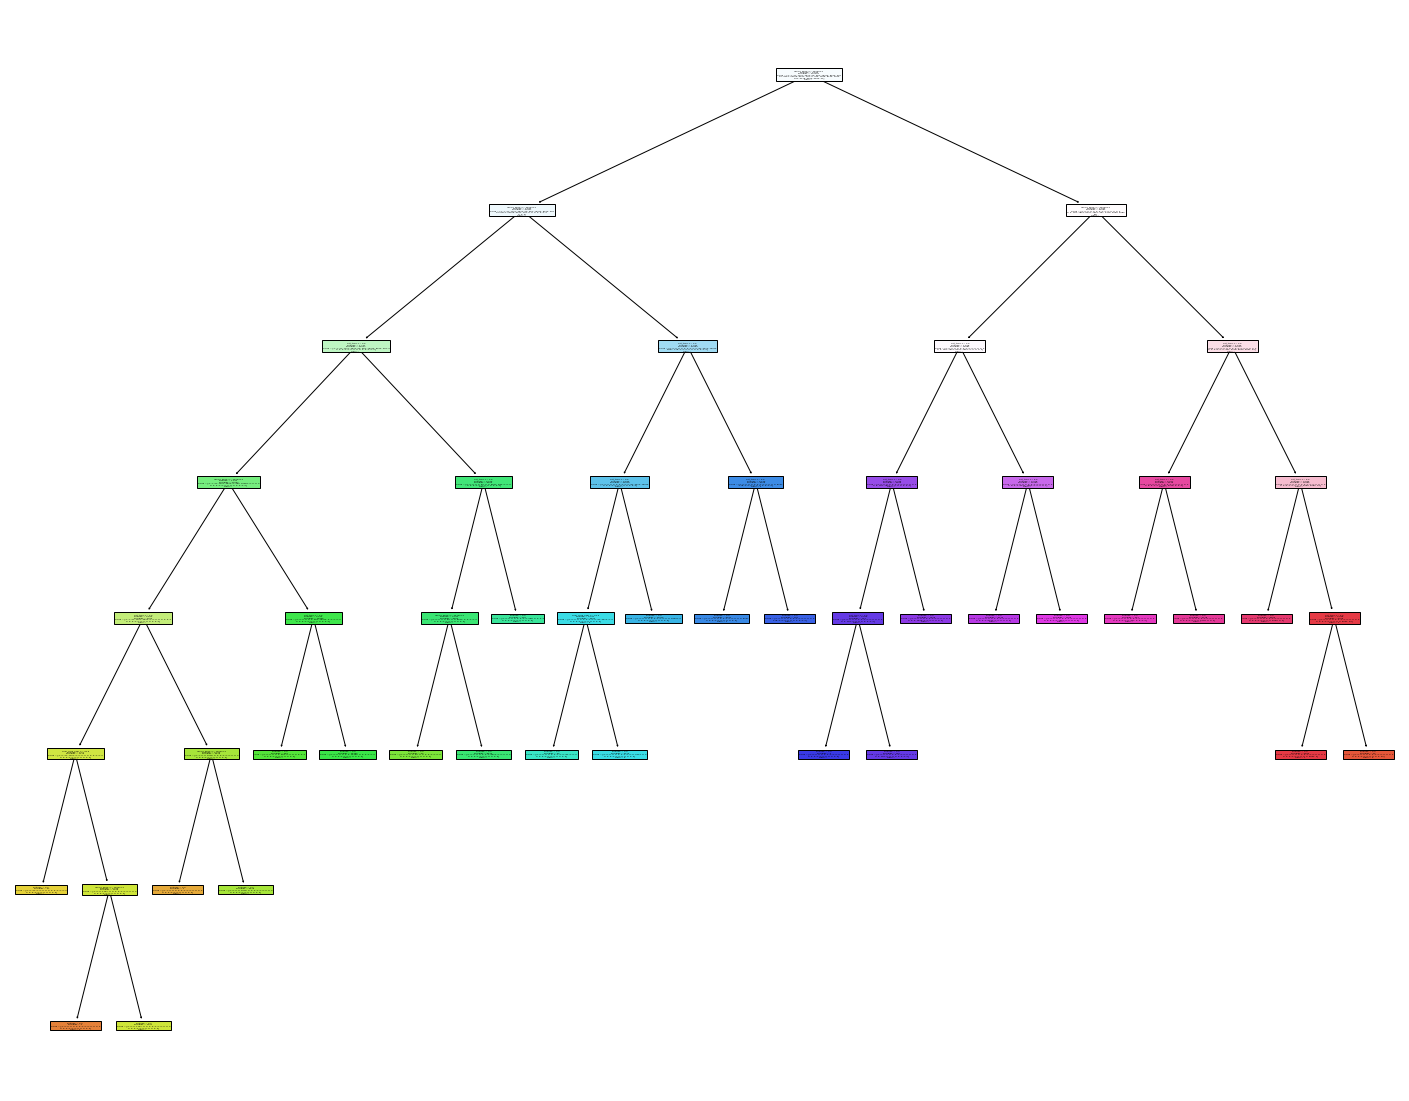

In [25]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf,feature_names=X.columns,class_names=str(Y),filled=True, impurity=True)


# Test decision tree, predict label

__Create user input data__

In [26]:
# user_choice_area = 150
# user_choice_price = 600000
# user_choice_flat = 6

DTTraining = dfClassified.drop(['town','storey_range','lease_commence_date','remaining_lease','number_of_people'],axis=1)
predicted_DT_label = 41
testData = [[user_choice_flat,user_choice_area,user_choice_price,predicted_DT_label]]
testData = pd.DataFrame(testData, columns=DTTraining.columns)
testData


,flat_type,floor_area_sqm,resale_price,label
0,6,150,600000,41


In [27]:
testY = testData['label']
testX = testData.drop(['label'],axis=1)

predY = clf.predict(testX)
predictions = pd.concat([testData,pd.Series(predY,name='Predicted Class')], axis=1)
predictions

,flat_type,floor_area_sqm,resale_price,label,Predicted Class
0,6,150,600000,41,41


In [28]:
dfResult = dfClassified.loc[dfClassified['label'] == predY[0]]
dfResult.sort_values(by=['resale_price']).head()

,town,flat_type,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,resale_price,number_of_people,label
83064,1,6,07 TO 09,142.0,1999,81 years 02 months,551000.0,7,41
60032,1,6,13 TO 15,141.0,1998,80 years 02 months,551000.0,7,41
41642,5,6,01 TO 03,146.0,1997,75 years 09 months,552000.0,7,41
50067,2,6,07 TO 09,128.0,2004,86 years,552500.0,7,41
85080,1,6,10 TO 12,141.0,1997,77 years 11 months,552800.0,7,41


# Show decision tree accuracy

In [29]:
from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))

Accuracy on test data is 1.00


Return dataset for predicted label

In [30]:
dfPredicted= pd.DataFrame()
for i in dfClassified.index:
    if int(dfClassified.label[i]) == int(predicted):
        dfPredicted = dfPredicted.append(dfTrim.loc[i])
        print(dfPredicted)

    flat_type  floor_area_sqm  lease_commence_date     remaining_lease  \
55  EXECUTIVE           147.0               1996.0  78 years 04 months   

    resale_price storey_range        town  
55      888000.0     07 TO 09  ANG MO KIO  
     flat_type  floor_area_sqm  lease_commence_date     remaining_lease  \
55   EXECUTIVE           147.0               1996.0  78 years 04 months   
185     4 ROOM           104.0               1983.0  65 years 10 months   

     resale_price storey_range         town  
55       888000.0     07 TO 09   ANG MO KIO  
185      450000.0     07 TO 09  BUKIT BATOK  
     flat_type  floor_area_sqm  lease_commence_date     remaining_lease  \
55   EXECUTIVE           147.0               1996.0  78 years 04 months   
185     4 ROOM           104.0               1983.0  65 years 10 months   
271     4 ROOM            91.0               2001.0  83 years 10 months   

     resale_price storey_range           town  
55       888000.0     07 TO 09     ANG MO KIO  
18

1399      255000.0     07 TO 09  BUKIT PANJANG  
      flat_type  floor_area_sqm  lease_commence_date     remaining_lease  \
55    EXECUTIVE           147.0               1996.0  78 years 04 months   
185      4 ROOM           104.0               1983.0  65 years 10 months   
271      4 ROOM            91.0               2001.0  83 years 10 months   
460      5 ROOM           110.0               2003.0  85 years 06 months   
461      5 ROOM           118.0               1997.0   79 years 01 month   
546      4 ROOM            90.0               2001.0  83 years 11 months   
704   EXECUTIVE           155.0               1989.0            71 years   
864      4 ROOM            93.0               2013.0   95 years 01 month   
928      3 ROOM            83.0               1987.0  69 years 05 months   
983      5 ROOM           120.0               1997.0  79 years 03 months   
1028     5 ROOM           117.0               1976.0  58 years 02 months   
1130     3 ROOM            73.0        

      flat_type  floor_area_sqm  lease_commence_date     remaining_lease  \
55    EXECUTIVE           147.0               1996.0  78 years 04 months   
185      4 ROOM           104.0               1983.0  65 years 10 months   
271      4 ROOM            91.0               2001.0  83 years 10 months   
460      5 ROOM           110.0               2003.0  85 years 06 months   
461      5 ROOM           118.0               1997.0   79 years 01 month   
546      4 ROOM            90.0               2001.0  83 years 11 months   
704   EXECUTIVE           155.0               1989.0            71 years   
864      4 ROOM            93.0               2013.0   95 years 01 month   
928      3 ROOM            83.0               1987.0  69 years 05 months   
983      5 ROOM           120.0               1997.0  79 years 03 months   
1028     5 ROOM           117.0               1976.0  58 years 02 months   
1130     3 ROOM            73.0               1988.0   70 years 01 month   
1131     3 R

3972      355000.0     10 TO 12      WOODLANDS  
      flat_type  floor_area_sqm  lease_commence_date     remaining_lease  \
55    EXECUTIVE           147.0               1996.0  78 years 04 months   
185      4 ROOM           104.0               1983.0  65 years 10 months   
271      4 ROOM            91.0               2001.0  83 years 10 months   
460      5 ROOM           110.0               2003.0  85 years 06 months   
461      5 ROOM           118.0               1997.0   79 years 01 month   
546      4 ROOM            90.0               2001.0  83 years 11 months   
704   EXECUTIVE           155.0               1989.0            71 years   
864      4 ROOM            93.0               2013.0   95 years 01 month   
928      3 ROOM            83.0               1987.0  69 years 05 months   
983      5 ROOM           120.0               1997.0  79 years 03 months   
1028     5 ROOM           117.0               1976.0  58 years 02 months   
1130     3 ROOM            73.0        

      flat_type  floor_area_sqm  lease_commence_date     remaining_lease  \
55    EXECUTIVE           147.0               1996.0  78 years 04 months   
185      4 ROOM           104.0               1983.0  65 years 10 months   
271      4 ROOM            91.0               2001.0  83 years 10 months   
460      5 ROOM           110.0               2003.0  85 years 06 months   
461      5 ROOM           118.0               1997.0   79 years 01 month   
546      4 ROOM            90.0               2001.0  83 years 11 months   
704   EXECUTIVE           155.0               1989.0            71 years   
864      4 ROOM            93.0               2013.0   95 years 01 month   
928      3 ROOM            83.0               1987.0  69 years 05 months   
983      5 ROOM           120.0               1997.0  79 years 03 months   
1028     5 ROOM           117.0               1976.0  58 years 02 months   
1130     3 ROOM            73.0               1988.0   70 years 01 month   
1131     3 R

      flat_type  floor_area_sqm  lease_commence_date     remaining_lease  \
55    EXECUTIVE           147.0               1996.0  78 years 04 months   
185      4 ROOM           104.0               1983.0  65 years 10 months   
271      4 ROOM            91.0               2001.0  83 years 10 months   
460      5 ROOM           110.0               2003.0  85 years 06 months   
461      5 ROOM           118.0               1997.0   79 years 01 month   
...         ...             ...                  ...                 ...   
4441     4 ROOM           112.0               1989.0  70 years 11 months   
4442     4 ROOM           103.0               1998.0  79 years 09 months   
4443     4 ROOM            96.0               1985.0            67 years   
4513     4 ROOM            85.0               2001.0  82 years 10 months   
4612  EXECUTIVE           146.0               1989.0  70 years 10 months   

      resale_price storey_range           town  
55        888000.0     07 TO 09     AN

      flat_type  floor_area_sqm  lease_commence_date     remaining_lease  \
55    EXECUTIVE           147.0               1996.0  78 years 04 months   
185      4 ROOM           104.0               1983.0  65 years 10 months   
271      4 ROOM            91.0               2001.0  83 years 10 months   
460      5 ROOM           110.0               2003.0  85 years 06 months   
461      5 ROOM           118.0               1997.0   79 years 01 month   
...         ...             ...                  ...                 ...   
4720     3 ROOM            67.0               1980.0  61 years 09 months   
4820     4 ROOM           100.0               1998.0            80 years   
4821     4 ROOM            96.0               1984.0  66 years 06 months   
4822     4 ROOM           101.0               1998.0            80 years   
4823     4 ROOM            89.0               1987.0  68 years 10 months   

      resale_price storey_range           town  
55        888000.0     07 TO 09     AN

      flat_type  floor_area_sqm  lease_commence_date     remaining_lease  \
55    EXECUTIVE           147.0               1996.0  78 years 04 months   
185      4 ROOM           104.0               1983.0  65 years 10 months   
271      4 ROOM            91.0               2001.0  83 years 10 months   
460      5 ROOM           110.0               2003.0  85 years 06 months   
461      5 ROOM           118.0               1997.0   79 years 01 month   
...         ...             ...                  ...                 ...   
4898     3 ROOM            68.0               1983.0  64 years 10 months   
4988     4 ROOM           103.0               1989.0            71 years   
4989     4 ROOM           106.0               1996.0  78 years 04 months   
4990     4 ROOM           103.0               1988.0  70 years 07 months   
4991     4 ROOM           109.0               1995.0  77 years 07 months   

      resale_price storey_range           town  
55        888000.0     07 TO 09     AN

      flat_type  floor_area_sqm  lease_commence_date     remaining_lease  \
55    EXECUTIVE           147.0               1996.0  78 years 04 months   
185      4 ROOM           104.0               1983.0  65 years 10 months   
271      4 ROOM            91.0               2001.0  83 years 10 months   
460      5 ROOM           110.0               2003.0  85 years 06 months   
461      5 ROOM           118.0               1997.0   79 years 01 month   
...         ...             ...                  ...                 ...   
5103     4 ROOM            84.0               1987.0            69 years   
5104     4 ROOM           102.0               1997.0  79 years 07 months   
5105     4 ROOM           103.0               1986.0  68 years 08 months   
5200     5 ROOM           129.0               1996.0  78 years 04 months   
5201     5 ROOM           122.0               1990.0  71 years 09 months   

      resale_price storey_range             town  
55        888000.0     07 TO 09     

      flat_type  floor_area_sqm  lease_commence_date     remaining_lease  \
55    EXECUTIVE           147.0               1996.0  78 years 04 months   
185      4 ROOM           104.0               1983.0  65 years 10 months   
271      4 ROOM            91.0               2001.0  83 years 10 months   
460      5 ROOM           110.0               2003.0  85 years 06 months   
461      5 ROOM           118.0               1997.0   79 years 01 month   
...         ...             ...                  ...                 ...   
5298     5 ROOM           110.0               2005.0  86 years 09 months   
5299     5 ROOM           111.0               2005.0  86 years 09 months   
5300     5 ROOM           111.0               2005.0  86 years 09 months   
5301     5 ROOM           110.0               2005.0  86 years 09 months   
5302     5 ROOM           110.0               2003.0  85 years 09 months   

      resale_price storey_range           town  
55        888000.0     07 TO 09     AN

      flat_type  floor_area_sqm  lease_commence_date     remaining_lease  \
55    EXECUTIVE           147.0               1996.0  78 years 04 months   
185      4 ROOM           104.0               1983.0  65 years 10 months   
271      4 ROOM            91.0               2001.0  83 years 10 months   
460      5 ROOM           110.0               2003.0  85 years 06 months   
461      5 ROOM           118.0               1997.0   79 years 01 month   
...         ...             ...                  ...                 ...   
5305     5 ROOM           110.0               2004.0  86 years 02 months   
5414     2 ROOM            44.0               2007.0  89 years 03 months   
5415     2 ROOM            48.0               2013.0  94 years 10 months   
5416     2 ROOM            44.0               2007.0  89 years 03 months   
5417     2 ROOM            50.0               2012.0  93 years 10 months   

      resale_price storey_range           town  
55        888000.0     07 TO 09     AN

      flat_type  floor_area_sqm  lease_commence_date     remaining_lease  \
55    EXECUTIVE           147.0               1996.0  78 years 04 months   
185      4 ROOM           104.0               1983.0  65 years 10 months   
271      4 ROOM            91.0               2001.0  83 years 10 months   
460      5 ROOM           110.0               2003.0  85 years 06 months   
461      5 ROOM           118.0               1997.0   79 years 01 month   
...         ...             ...                  ...                 ...   
5505     5 ROOM           110.0               2003.0  85 years 04 months   
5506     5 ROOM           109.0               2003.0  85 years 08 months   
5507     5 ROOM           110.0               2001.0  83 years 07 months   
5508     5 ROOM           110.0               2001.0  83 years 07 months   
5509     5 ROOM           110.0               2001.0  83 years 05 months   

      resale_price storey_range           town  
55        888000.0     07 TO 09     AN

[119 rows x 7 columns]
      flat_type  floor_area_sqm  lease_commence_date     remaining_lease  \
55    EXECUTIVE           147.0               1996.0  78 years 04 months   
185      4 ROOM           104.0               1983.0  65 years 10 months   
271      4 ROOM            91.0               2001.0  83 years 10 months   
460      5 ROOM           110.0               2003.0  85 years 06 months   
461      5 ROOM           118.0               1997.0   79 years 01 month   
...         ...             ...                  ...                 ...   
5566     4 ROOM            96.0               1985.0  66 years 10 months   
5567     4 ROOM            84.0               1986.0   68 years 01 month   
5568     4 ROOM            84.0               1985.0  67 years 03 months   
5632     4 ROOM           103.0               1997.0  79 years 02 months   
5633     4 ROOM           102.0               1996.0  78 years 02 months   

      resale_price storey_range           town  
55        88800

[129 rows x 7 columns]
      flat_type  floor_area_sqm  lease_commence_date     remaining_lease  \
55    EXECUTIVE           147.0               1996.0  78 years 04 months   
185      4 ROOM           104.0               1983.0  65 years 10 months   
271      4 ROOM            91.0               2001.0  83 years 10 months   
460      5 ROOM           110.0               2003.0  85 years 06 months   
461      5 ROOM           118.0               1997.0   79 years 01 month   
...         ...             ...                  ...                 ...   
5726     3 ROOM            68.0               1969.0  51 years 02 months   
5727     3 ROOM            65.0               1967.0  49 years 02 months   
5728     3 ROOM            68.0               1970.0  51 years 09 months   
5729     3 ROOM            67.0               1972.0  54 years 03 months   
5828     5 ROOM           126.0               1976.0  57 years 11 months   

      resale_price storey_range           town  
55        88800

      flat_type  floor_area_sqm  lease_commence_date     remaining_lease  \
55    EXECUTIVE           147.0               1996.0  78 years 04 months   
185      4 ROOM           104.0               1983.0  65 years 10 months   
271      4 ROOM            91.0               2001.0  83 years 10 months   
460      5 ROOM           110.0               2003.0  85 years 06 months   
461      5 ROOM           118.0               1997.0   79 years 01 month   
...         ...             ...                  ...                 ...   
5831     5 ROOM           111.0               2004.0  85 years 10 months   
5832     5 ROOM           122.0               1997.0  79 years 05 months   
5912     3 ROOM            67.0               1984.0  66 years 05 months   
5913     3 ROOM            64.0               1992.0  74 years 02 months   
5914     3 ROOM            68.0               1984.0            66 years   

      resale_price storey_range           town  
55        888000.0     07 TO 09     AN

[145 rows x 7 columns]
      flat_type  floor_area_sqm  lease_commence_date     remaining_lease  \
55    EXECUTIVE           147.0               1996.0  78 years 04 months   
185      4 ROOM           104.0               1983.0  65 years 10 months   
271      4 ROOM            91.0               2001.0  83 years 10 months   
460      5 ROOM           110.0               2003.0  85 years 06 months   
461      5 ROOM           118.0               1997.0   79 years 01 month   
...         ...             ...                  ...                 ...   
5919     3 ROOM            67.0               1986.0  67 years 09 months   
5920     3 ROOM            67.0               1985.0  67 years 02 months   
5921     3 ROOM            67.0               2012.0  94 years 04 months   
6014     2 ROOM            44.0               1980.0   62 years 01 month   
6142     3 ROOM            67.0               1977.0  59 years 02 months   

      resale_price storey_range           town  
55        88800

[152 rows x 7 columns]
      flat_type  floor_area_sqm  lease_commence_date     remaining_lease  \
55    EXECUTIVE           147.0               1996.0  78 years 04 months   
185      4 ROOM           104.0               1983.0  65 years 10 months   
271      4 ROOM            91.0               2001.0  83 years 10 months   
460      5 ROOM           110.0               2003.0  85 years 06 months   
461      5 ROOM           118.0               1997.0   79 years 01 month   
...         ...             ...                  ...                 ...   
6145     3 ROOM            65.0               1977.0            59 years   
6146     3 ROOM            67.0               1977.0  59 years 02 months   
6147     3 ROOM            67.0               1978.0            60 years   
6249  EXECUTIVE           146.0               1992.0  73 years 11 months   
6250  EXECUTIVE           150.0               1992.0            74 years   

      resale_price storey_range           town  
55        88800

      flat_type  floor_area_sqm  lease_commence_date     remaining_lease  \
55    EXECUTIVE           147.0               1996.0  78 years 04 months   
185      4 ROOM           104.0               1983.0  65 years 10 months   
271      4 ROOM            91.0               2001.0  83 years 10 months   
460      5 ROOM           110.0               2003.0  85 years 06 months   
461      5 ROOM           118.0               1997.0   79 years 01 month   
...         ...             ...                  ...                 ...   
6352     3 ROOM            88.0               1974.0  55 years 08 months   
6353     3 ROOM            88.0               1973.0  54 years 08 months   
6458     5 ROOM           121.0               1997.0            79 years   
6459     5 ROOM           114.0               2002.0  84 years 02 months   
6460     5 ROOM           122.0               1988.0            70 years   

      resale_price storey_range           town  
55        888000.0     07 TO 09     AN

      flat_type  floor_area_sqm  lease_commence_date     remaining_lease  \
55    EXECUTIVE           147.0               1996.0  78 years 04 months   
185      4 ROOM           104.0               1983.0  65 years 10 months   
271      4 ROOM            91.0               2001.0  83 years 10 months   
460      5 ROOM           110.0               2003.0  85 years 06 months   
461      5 ROOM           118.0               1997.0   79 years 01 month   
...         ...             ...                  ...                 ...   
6464     5 ROOM           110.0               2004.0  86 years 06 months   
6465     5 ROOM           110.0               2001.0  83 years 06 months   
6550     5 ROOM           110.0               2002.0  84 years 05 months   
6551     5 ROOM           119.0               1979.0  60 years 08 months   
6552     5 ROOM           121.0               1999.0  80 years 09 months   

      resale_price storey_range           town  
55        888000.0     07 TO 09     AN

      flat_type  floor_area_sqm  lease_commence_date     remaining_lease  \
55    EXECUTIVE           147.0               1996.0  78 years 04 months   
185      4 ROOM           104.0               1983.0  65 years 10 months   
271      4 ROOM            91.0               2001.0  83 years 10 months   
460      5 ROOM           110.0               2003.0  85 years 06 months   
461      5 ROOM           118.0               1997.0   79 years 01 month   
...         ...             ...                  ...                 ...   
6554     5 ROOM           110.0               2003.0            85 years   
6555     5 ROOM           110.0               2003.0  85 years 03 months   
6640     3 ROOM            61.0               1969.0  50 years 09 months   
6641     3 ROOM            56.0               1969.0  50 years 08 months   
6642     3 ROOM            59.0               1977.0            59 years   

      resale_price storey_range           town  
55        888000.0     07 TO 09     AN

      flat_type  floor_area_sqm  lease_commence_date     remaining_lease  \
55    EXECUTIVE           147.0               1996.0  78 years 04 months   
185      4 ROOM           104.0               1983.0  65 years 10 months   
271      4 ROOM            91.0               2001.0  83 years 10 months   
460      5 ROOM           110.0               2003.0  85 years 06 months   
461      5 ROOM           118.0               1997.0   79 years 01 month   
...         ...             ...                  ...                 ...   
6724     4 ROOM            91.0               1986.0  67 years 08 months   
6725     4 ROOM           100.0               1997.0            79 years   
6726     4 ROOM            97.0               1984.0  66 years 07 months   
6727     4 ROOM            84.0               1987.0  68 years 11 months   
6809     3 ROOM            59.0               1975.0  57 years 06 months   

      resale_price storey_range           town  
55        888000.0     07 TO 09     AN

[189 rows x 7 columns]
      flat_type  floor_area_sqm  lease_commence_date     remaining_lease  \
55    EXECUTIVE           147.0               1996.0  78 years 04 months   
185      4 ROOM           104.0               1983.0  65 years 10 months   
271      4 ROOM            91.0               2001.0  83 years 10 months   
460      5 ROOM           110.0               2003.0  85 years 06 months   
461      5 ROOM           118.0               1997.0   79 years 01 month   
...         ...             ...                  ...                 ...   
6813     3 ROOM            61.0               1974.0  56 years 02 months   
6893     4 ROOM            93.0               2006.0   88 years 01 month   
6894     4 ROOM            95.0               2001.0            83 years   
6988     3 ROOM            68.0               1979.0  60 years 08 months   
6989     3 ROOM            75.0               1981.0  62 years 09 months   

      resale_price storey_range             town  
55        888

[198 rows x 7 columns]
      flat_type  floor_area_sqm  lease_commence_date     remaining_lease  \
55    EXECUTIVE           147.0               1996.0  78 years 04 months   
185      4 ROOM           104.0               1983.0  65 years 10 months   
271      4 ROOM            91.0               2001.0  83 years 10 months   
460      5 ROOM           110.0               2003.0  85 years 06 months   
461      5 ROOM           118.0               1997.0   79 years 01 month   
...         ...             ...                  ...                 ...   
7090  EXECUTIVE           150.0               1993.0  75 years 02 months   
7091  EXECUTIVE           146.0               1993.0  75 years 02 months   
7092  EXECUTIVE           147.0               1993.0  75 years 04 months   
7189     5 ROOM           110.0               2003.0   85 years 01 month   
7190     5 ROOM           110.0               2003.0  85 years 06 months   

      resale_price storey_range           town  
55        88800

      flat_type  floor_area_sqm  lease_commence_date     remaining_lease  \
55    EXECUTIVE           147.0               1996.0  78 years 04 months   
185      4 ROOM           104.0               1983.0  65 years 10 months   
271      4 ROOM            91.0               2001.0  83 years 10 months   
460      5 ROOM           110.0               2003.0  85 years 06 months   
461      5 ROOM           118.0               1997.0   79 years 01 month   
...         ...             ...                  ...                 ...   
7375     4 ROOM            92.0               2011.0  93 years 06 months   
7376     4 ROOM            94.0               2013.0   95 years 01 month   
7377     4 ROOM            94.0               2012.0  94 years 06 months   
7378     4 ROOM            95.0               2000.0  82 years 02 months   
7478     3 ROOM            73.0               1978.0   60 years 01 month   

      resale_price storey_range           town  
55        888000.0     07 TO 09     AN

      flat_type  floor_area_sqm  lease_commence_date     remaining_lease  \
55    EXECUTIVE           147.0               1996.0  78 years 04 months   
185      4 ROOM           104.0               1983.0  65 years 10 months   
271      4 ROOM            91.0               2001.0  83 years 10 months   
460      5 ROOM           110.0               2003.0  85 years 06 months   
461      5 ROOM           118.0               1997.0   79 years 01 month   
...         ...             ...                  ...                 ...   
7712     3 ROOM            81.0               1986.0   68 years 01 month   
7713     3 ROOM            68.0               1981.0  63 years 06 months   
7788     4 ROOM            94.0               2003.0  84 years 09 months   
7789     4 ROOM            93.0               2013.0   95 years 01 month   
7790     4 ROOM           106.0               1996.0  78 years 02 months   

      resale_price storey_range           town  
55        888000.0     07 TO 09     AN

[239 rows x 7 columns]
      flat_type  floor_area_sqm  lease_commence_date     remaining_lease  \
55    EXECUTIVE           147.0               1996.0  78 years 04 months   
185      4 ROOM           104.0               1983.0  65 years 10 months   
271      4 ROOM            91.0               2001.0  83 years 10 months   
460      5 ROOM           110.0               2003.0  85 years 06 months   
461      5 ROOM           118.0               1997.0   79 years 01 month   
...         ...             ...                  ...                 ...   
8087     5 ROOM           117.0               2011.0  93 years 02 months   
8088     5 ROOM           120.0               2011.0  93 years 02 months   
8089  EXECUTIVE           149.0               1996.0  77 years 11 months   
8108     3 ROOM            67.0               1978.0  59 years 11 months   
8129     4 ROOM            92.0               1978.0  59 years 09 months   

      resale_price storey_range           town  
55        88800

      flat_type  floor_area_sqm  lease_commence_date     remaining_lease  \
55    EXECUTIVE           147.0               1996.0  78 years 04 months   
185      4 ROOM           104.0               1983.0  65 years 10 months   
271      4 ROOM            91.0               2001.0  83 years 10 months   
460      5 ROOM           110.0               2003.0  85 years 06 months   
461      5 ROOM           118.0               1997.0   79 years 01 month   
...         ...             ...                  ...                 ...   
8415     5 ROOM           107.0               2011.0  92 years 07 months   
8416     3 ROOM            73.0               1989.0  71 years 03 months   
8417     3 ROOM            67.0               2013.0   95 years 01 month   
8418     3 ROOM            68.0               2013.0  95 years 02 months   
8556     3 ROOM            65.0               1977.0  58 years 08 months   

      resale_price storey_range           town  
55        888000.0     07 TO 09     AN

KeyError: 8702

In [31]:
for j in dfPredicted.index:
    df_years = float(dfPredicted.remaining_lease[j][None:2])
    #print(df_years)
    df_month = (dfPredicted.remaining_lease[j].replace("months","").replace("month","")[9:None])
    print('{0},{1}:'.format(df_month,j))
    #totalRemainingYear = (df_years) + ((df_month)/12)
    #print('{0}\n'.format(totalRemainingYear))

04 ,55:
10 ,185:
10 ,271:
06 ,460:
01 ,461:
11 ,546:
,704:
01 ,864:
05 ,928:
03 ,983:
02 ,1028:
01 ,1130:
06 ,1131:
08 ,1132:
08 ,1232:
,1298:
11 ,1299:
03 ,1397:
03 ,1398:
02 ,1399:
09 ,1400:
10 ,1401:
11 ,1517:
11 ,1518:
11 ,1519:
03 ,1615:
04 ,1696:
02 ,1870:
,1937:
07 ,1938:
05 ,2148:
02 ,2149:
,2658:
,2887:
04 ,2888:
07 ,2889:
03 ,2975:
06 ,2976:
,3053:
10 ,3486:
08 ,3586:
08 ,3587:
11 ,3588:
11 ,3589:
06 ,3590:
06 ,3789:
07 ,3879:
03 ,3880:
03 ,3881:
07 ,3972:
03 ,3973:
08 ,4062:
06 ,4063:
03 ,4237:
02 ,4314:
10 ,4373:
02 ,4440:
11 ,4441:
09 ,4442:
,4443:
10 ,4513:
10 ,4612:
05 ,4613:
05 ,4614:
09 ,4717:
07 ,4718:
05 ,4719:
09 ,4720:
,4820:
06 ,4821:
,4822:
10 ,4823:
,4895:
02 ,4896:
01 ,4897:
10 ,4898:
,4988:
04 ,4989:
07 ,4990:
07 ,4991:
05 ,5100:
02 ,5101:
,5102:
,5103:
07 ,5104:
08 ,5105:
04 ,5200:
09 ,5201:
04 ,5202:
02 ,5297:
09 ,5298:
09 ,5299:
09 ,5300:
09 ,5301:
09 ,5302:
07 ,5303:
09 ,5304:
02 ,5305:
03 ,5414:
10 ,5415:
03 ,5416:
10 ,5417:
10 ,5418:
02 ,5419:
07 ,5420:


# Part 4 : Data Analysis

__Confusion Matrix for KNN__

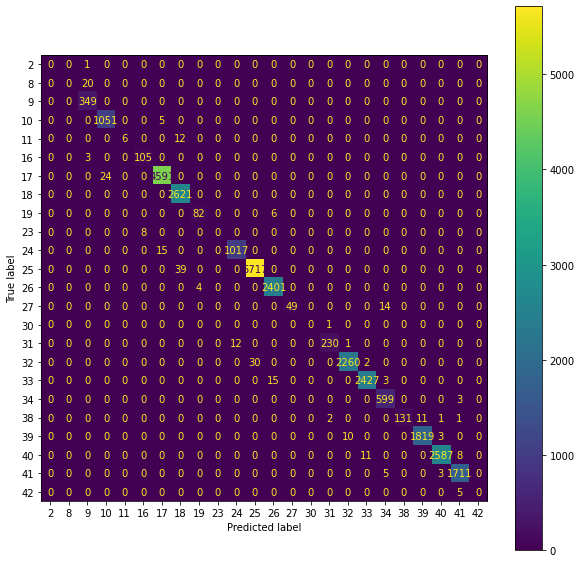

In [32]:
fig, ax = plt.subplots(figsize=(10, 10))
metrics.plot_confusion_matrix(clfKNN, X_test, Y_test, ax=ax)

__Confusion Matrix for Decision Tree__

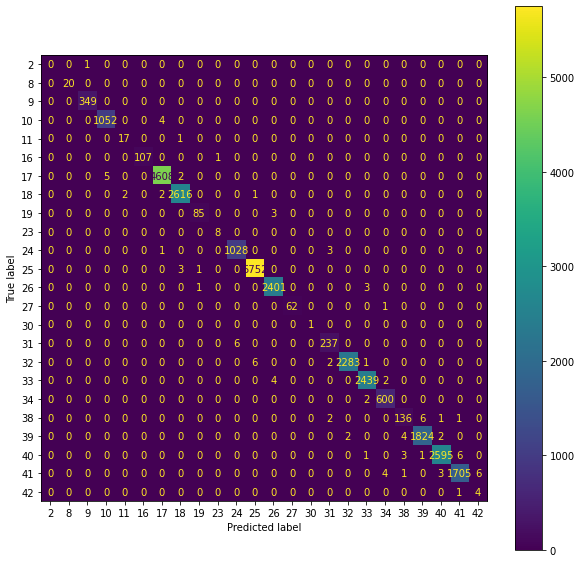

In [33]:
fig, ax = plt.subplots(figsize=(10, 10))
metrics.plot_confusion_matrix(clfDT, X_test, Y_test, ax=ax)

__ROC for KNN__

__ROC for Decision Tree__